<center>
    <h1>University of Canberra</h1>
    <h3>11482 - Pattern Recognition and Machine Learning</h3>
    <h3>Tutorial Class Thursday 0930 (Semester 2 / 2024)</h3>
    <h2>Unit Project Stage 2</h2>
    <h2>Group 101 (Individual)</h2>
    <h2>James McGuinness</h2>
    ______________________________________________________________________________________________________________________________________________________
</center>


# Introduction

The objective for Part A of this assignment is to identify key features in a dataset and build a model that can accurately predict outcomes on new data. I approached the task with the mindset that this could be a field I may want to pursue as the next step in my career or future study.

A main goal of mine was to not become overwhelmed and lost in the data, or waste time going down rabbit holes and accumulating technical debt with redundant code.  

I came to the University of Canberra as a mature-aged student, and I've found this subject one of the most interesting so far. I’ve spent more time than expected on visualization and exploration of the data as I’ve realized fully understanding the data is a crucial if we're to tune and improve predictions.

Last semester, I took the subject Exploratory Data Analysis and Visualization, where we worked with the AMES Housing dataset for regression. With the knowledge I've gained since, I'm eager to revisit this dataset and apply new techniques.

Assignments like this one often serve as a thought experiment for me. I find they're a good opportunity to push and test boundaries. While this sometimes leads to deviating slightly from the rubric, I find it an enjoyable and valuable way for learning.

Throughout the project, I've relied heavily on resources such as *Introduction to Machine Learning with Python* and Jason Brownlee’s textbook and articles. This process has been one of exploration and discovery, and I hope the insights I've gained will be beneficial in the future.

Towards the end of the project, I also incorporated assistance from AI to explore ways in which functions could be nested and scaled more effectively.

As I progress through this part of the assignment, my goal is to visually analyze and identify features that I believe indicate malignancy. I will then validate these features by applying models from sklearn to determine their significance as predictors of malignant breast cancer samples.

# Part A

### Prerequisites and Libraries to import

In [13]:
import numpy as np
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Preprocessing (Criteria B1)
Data set selection and description of dataset and features.  
Explain if any pre-processing would be required for the chosen dataset.  
Explain how the features would be used in model development. (Use any feedback from Assn1).  
(*10 pts*)

**Answer:**  
The *Breast Cancer Dataset* in the sklearn library is a well-known dataset used for binary classification tasks.

*Dataset Overview*
- **Source**: The dataset comes from the UCI Machine Learning Repository.
- **Type**: Supervised binary classification.
- **Classes**: Two classes—**benign** (coded as `0`) and **malignant** (coded as `1`).
  
*Features*
The dataset contains **30 numerical features**, which are computed from digitized images of a breast mass. These features describe the characteristics of the cell nuclei present in the image, with attributes like:
1. **Radius** (mean, standard error, worst)
2. **Texture** (mean, standard error, worst)
3. **Perimeter** (mean, standard error, worst)
4. **Area** (mean, standard error, worst)
5. **Smoothness** (mean, standard error, worst)
6. **Compactness** (mean, standard error, worst)
7. **Concavity** (mean, standard error, worst)
8. **Concave points** (mean, standard error, worst)
9. **Symmetry** (mean, standard error, worst)
10. **Fractal dimension** (mean, standard error, worst)

For each feature, the dataset provides the **mean**, **standard error**, and **worst** (largest) value, resulting in the 30 features in total.

*Dataset Summary*
- **Samples**: 569 total samples.
  - **Benign**: 357 samples.
  - **Malignant**: 212 samples.
- **Number of Features**: 30 numerical features, described above.
- **Target Variable**: Binary classification (benign = 0, malignant = 1).

*Use Case*
The goal of the dataset is to build a model that can predict whether a tumor is malignant or benign based on the provided features.

The below print statements gave me a high level and quick reference when I wanted to navigate and pick up where I was in between study breaks.

From an initial pre-processing observation, there were no missing values. And I decided to only identify outliers, not remove them.

There was also the below DESCR property that gives a description of the dataset, but I didn't use this very much.

    cancer.DESCR

Throughout the assignment I discovered more about the dataset which surprised me and made me wonder why I didn't noticed it earlier.
1. There are 30 measurements per sample; however these measurements are actually made up of 10 Mean measurements, 10 of the Worst measurement and then 10 Standard Error measurement.
2. Each of the 569 samples represent a single cell, I found this super fascinating.
3. The two classes represented by zero and one, are actually inverted regarding the positive class and being malignant.

I believe some of the "Worst measurement" features could be used, however it may be too early to say which features will be used in model development.  

I believe the reason why we want to find the specific features to use in training model is obviously to have accurate results, but to also save time on training and therefore predicting.  

Addressing feedback from Assignment Part 1; the motivation for this assignment lies in the fact that this problem is a global health issue and remains an open research problem where publications, clinical trials and machine learning methods are still being developed.

In [14]:
print("Dataset summary")
print(f"- Shape: {cancer.data.shape}")
print(f"- Types: {cancer.data.dtype}")
print(f"- Samples: {len(cancer.data)}")
print(f"- Features: {len(cancer.feature_names)}")
print(f"- Features names: {cancer.feature_names[:4]}")
print(f"- Data values of a sample: {cancer.data[0, :4]}")
print(f"- Target classes: {cancer.target[0:20]}")
print(f"- Target class names: {cancer.target_names}")
print("\nClass Distribution")
print("- Counts per Class:{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(f"- Count of 0's is {np.count_nonzero(cancer.target == 0)} which represents Malignant")
print(f"- Count of 1's is {np.count_nonzero(cancer.target == 1)} which represents Benign")

Dataset summary
- Shape: (569, 30)
- Types: float64
- Samples: 569
- Features: 30
- Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area']
- Data values of a sample: [  17.99   10.38  122.8  1001.  ]
- Target classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
- Target class names: ['malignant' 'benign']

Class Distribution
- Counts per Class:{'malignant': 212, 'benign': 357}
- Count of 0's is 212 which represents Malignant
- Count of 1's is 357 which represents Benign


### Statistics (Pandas DataFrame)
- I used the below **describe()** function to show the statistics of the dataset and to potentially identify outliers.
- The table displays similar information to what a Boxplot would illustrate. 

In [15]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class_label'] = cancer.target
set_option('display.width', 100)
set_option('display.precision', 3)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_label
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,1.000


### Single sample of a cell (Pandas DataFrame)
- I used the below code to illustrate each set of measurements in a clear way.

In [192]:
features = cancer.feature_names
first_row_data = cancer.data[1]
df1 = pd.DataFrame({
    'Mean': features[:10],
    'Values': first_row_data[:10]
})
df2 = pd.DataFrame({
    'Standard Error': features[10:20],
    'Values': first_row_data[10:20]
})
df3 = pd.DataFrame({
    'Worst': features[20:30],
    'Values': first_row_data[20:30]
})
df_combined = pd.concat([df1, df2, df3], axis=1)
df_combined

,Mean,Values,Standard Error,Values,Worst,Values
0,mean radius,20.570,radius error,0.543,worst radius,24.990
1,mean texture,17.770,texture error,0.734,worst texture,23.410
2,mean perimeter,132.900,perimeter error,3.398,worst perimeter,158.800
3,mean area,1326.000,area error,74.080,worst area,1956.000
4,mean smoothness,0.085,smoothness error,0.005,worst smoothness,0.124
5,mean compactness,0.079,compactness error,0.013,worst compactness,0.187
6,mean concavity,0.087,concavity error,0.019,worst concavity,0.242
7,mean concave points,0.070,concave points error,0.013,worst concave points,0.186
8,mean symmetry,0.181,symmetry error,0.014,worst symmetry,0.275
9,mean fractal dimension,0.057,fractal dimension error,0.004,worst fractal dimension,0.089


### Displaying the Radius feature (Pandas DataFrame)
- I found displaying the radius feature measurements and the associated class label helpful.

In [15]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
labels_df = pd.DataFrame(cancer.target, columns=['label'])
labels_df['label'] = labels_df['label'].map({0: '0 - Malignant', 1: '1 - Benign'})
selected_columns = cancer_df[['mean radius', 'radius error', 'worst radius']]
result_df = pd.concat([selected_columns, labels_df], axis=1)
result_df.head(10)


,mean radius,radius error,worst radius,label
0,17.99,1.095,25.38,0 - Malignant
1,20.57,0.543,24.99,0 - Malignant
2,19.69,0.746,23.57,0 - Malignant
3,11.42,0.496,14.91,0 - Malignant
4,20.29,0.757,22.54,0 - Malignant
5,12.45,0.335,15.47,0 - Malignant
6,18.25,0.447,22.88,0 - Malignant
7,13.71,0.584,17.06,0 - Malignant
8,13.00,0.306,15.49,0 - Malignant
9,12.46,0.298,15.09,0 - Malignant


## Visualisation (Criteria B2)
Dataset analysis, visualisation, feature correlation, insights extracted from data visualisation to be used for guiding model development.  
(*10 pts*)

**Answer:**  
When creating the correlation table, I tried to determine if a feature correlates to class label. I thought potentially this would highlight which features to use.  
from the table I can see which features are positively correlated, meaning they both move upwards. Or which was negatively correlated, meaning as one goes up - the other declines.

### Feature Correlation

In [255]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class_label'] = cancer.target
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_label
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-3.116e-01,...,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-7.644e-02,...,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-2.615e-01,...,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-2.831e-01,...,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,5.848e-01,...,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,5.654e-01,...,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,3.368e-01,...,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,1.669e-01,...,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,4.799e-01,...,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000e+00,...,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767,0.013


- The second correlation table below shows only the means measurements and the corresponding label, however I'm not sure if I am obfuscating something important by doing this.
- From the matrix I have noted the following features:
1. mean perimeter
2. mean area
3. mean concavity
4. mean concave points

In [44]:
mean_attributes = df.iloc[:, :10].copy() 
mean_attributes.loc[:, 'class_label'] = df['class_label']
mean_attributes.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class_label
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,0.013


- Standard Error measurements and class label correlation below:

In [45]:
se_attributes = df.iloc[:, 10:20].copy()
se_attributes.loc[:, 'class_label'] = df['class_label']
se_attributes.corr()

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,class_label
radius error,1.000,0.213,0.973,0.952,0.165,0.356,0.332,0.513,0.241,0.228,-0.567
texture error,0.213,1.000,0.223,0.112,0.397,0.232,0.195,0.230,0.412,0.280,0.008
perimeter error,0.973,0.223,1.000,0.938,0.151,0.416,0.362,0.556,0.266,0.244,-0.556
area error,0.952,0.112,0.938,1.000,0.075,0.285,0.271,0.416,0.134,0.127,-0.548
smoothness error,0.165,0.397,0.151,0.075,1.000,0.337,0.269,0.328,0.414,0.427,0.067
compactness error,0.356,0.232,0.416,0.285,0.337,1.000,0.801,0.744,0.395,0.803,-0.293
concavity error,0.332,0.195,0.362,0.271,0.269,0.801,1.000,0.772,0.309,0.727,-0.254
concave points error,0.513,0.230,0.556,0.416,0.328,0.744,0.772,1.000,0.313,0.611,-0.408
symmetry error,0.241,0.412,0.266,0.134,0.414,0.395,0.309,0.313,1.000,0.369,0.007
fractal dimension error,0.228,0.280,0.244,0.127,0.427,0.803,0.727,0.611,0.369,1.000,-0.078


- The following features to investigate or take note of so far:
1. Mean and worst perimeter
2. Mean and worst area
3. Mean and worst concavity
4. Mean and worst concave points

And:
1. Worst Radius

In [50]:
worst_attributes = df.iloc[:, 20:30].copy()
worst_attributes.loc[:, 'class_label'] = df['class_label']
worst_attributes.corr()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class_label
worst radius,1.000,0.360,0.994,0.984,0.217,0.476,0.574,0.787,0.244,0.093,-0.776
worst texture,0.360,1.000,0.365,0.346,0.225,0.361,0.368,0.360,0.233,0.219,-0.457
worst perimeter,0.994,0.365,1.000,0.978,0.237,0.529,0.618,0.816,0.269,0.139,-0.783
worst area,0.984,0.346,0.978,1.000,0.209,0.438,0.543,0.747,0.209,0.080,-0.734
worst smoothness,0.217,0.225,0.237,0.209,1.000,0.568,0.519,0.548,0.494,0.618,-0.421
worst compactness,0.476,0.361,0.529,0.438,0.568,1.000,0.892,0.801,0.614,0.810,-0.591
worst concavity,0.574,0.368,0.618,0.543,0.519,0.892,1.000,0.855,0.533,0.687,-0.660
worst concave points,0.787,0.360,0.816,0.747,0.548,0.801,0.855,1.000,0.503,0.511,-0.794
worst symmetry,0.244,0.233,0.269,0.209,0.494,0.614,0.533,0.503,1.000,0.538,-0.416
worst fractal dimension,0.093,0.219,0.139,0.080,0.618,0.810,0.687,0.511,0.538,1.000,-0.324


### Skew
- From viewing the skew of data, can I make a decision if I need to scale or transform the data.
- Showing the skew of the mean measurement we can see:
1. Outliers for high measurements in radius, perimeter, area, compactness and concavity.
2. Potentially a Linear models might not perform well with the skews shown in this data.

In [34]:
df.iloc[:, :10].skew()

mean radius               0.942
mean texture              0.650
mean perimeter            0.991
mean area                 1.646
mean smoothness           0.456
mean compactness          1.190
mean concavity            1.401
mean concave points       1.171
mean symmetry             0.726
mean fractal dimension    1.304
dtype: float64

In [35]:
df.iloc[:, 10:20].skew()

radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
dtype: float64

In [36]:
df.iloc[:, 20:30].skew()

worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
dtype: float64

### Histograms
- To determine outliers, Gaussian, skewed or exponential distribution

<Figure size 1200x1000 with 0 Axes>

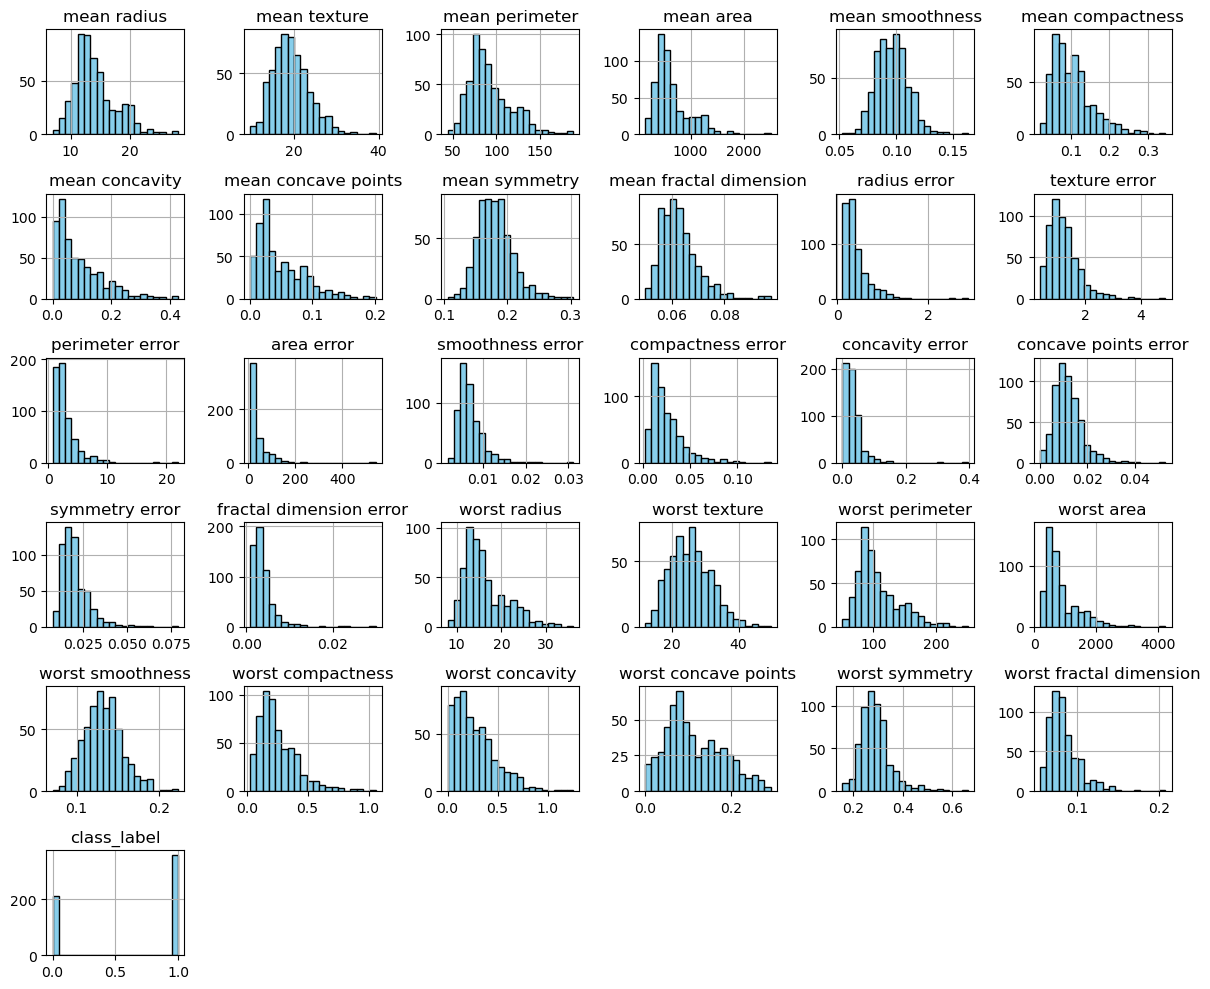

In [256]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

- The following code was sourced from:  
*Müller A, Guido S (2016) Introduction to Machine Learning with Python A Guide for Data Scientists. O'Reilly Media. Page 142*
- From these histograms we can see they also support the previous features identified that we should investigate further for modelling:
1. Mean and worst perimeter
2. Mean and worst area
3. Mean and worst concavity
4. Mean and worst concave points
5. Worst Radius

In addition to above:
1. Mean radius
2. worst perimeter 

And definitely highlights:
1. Worst concave points

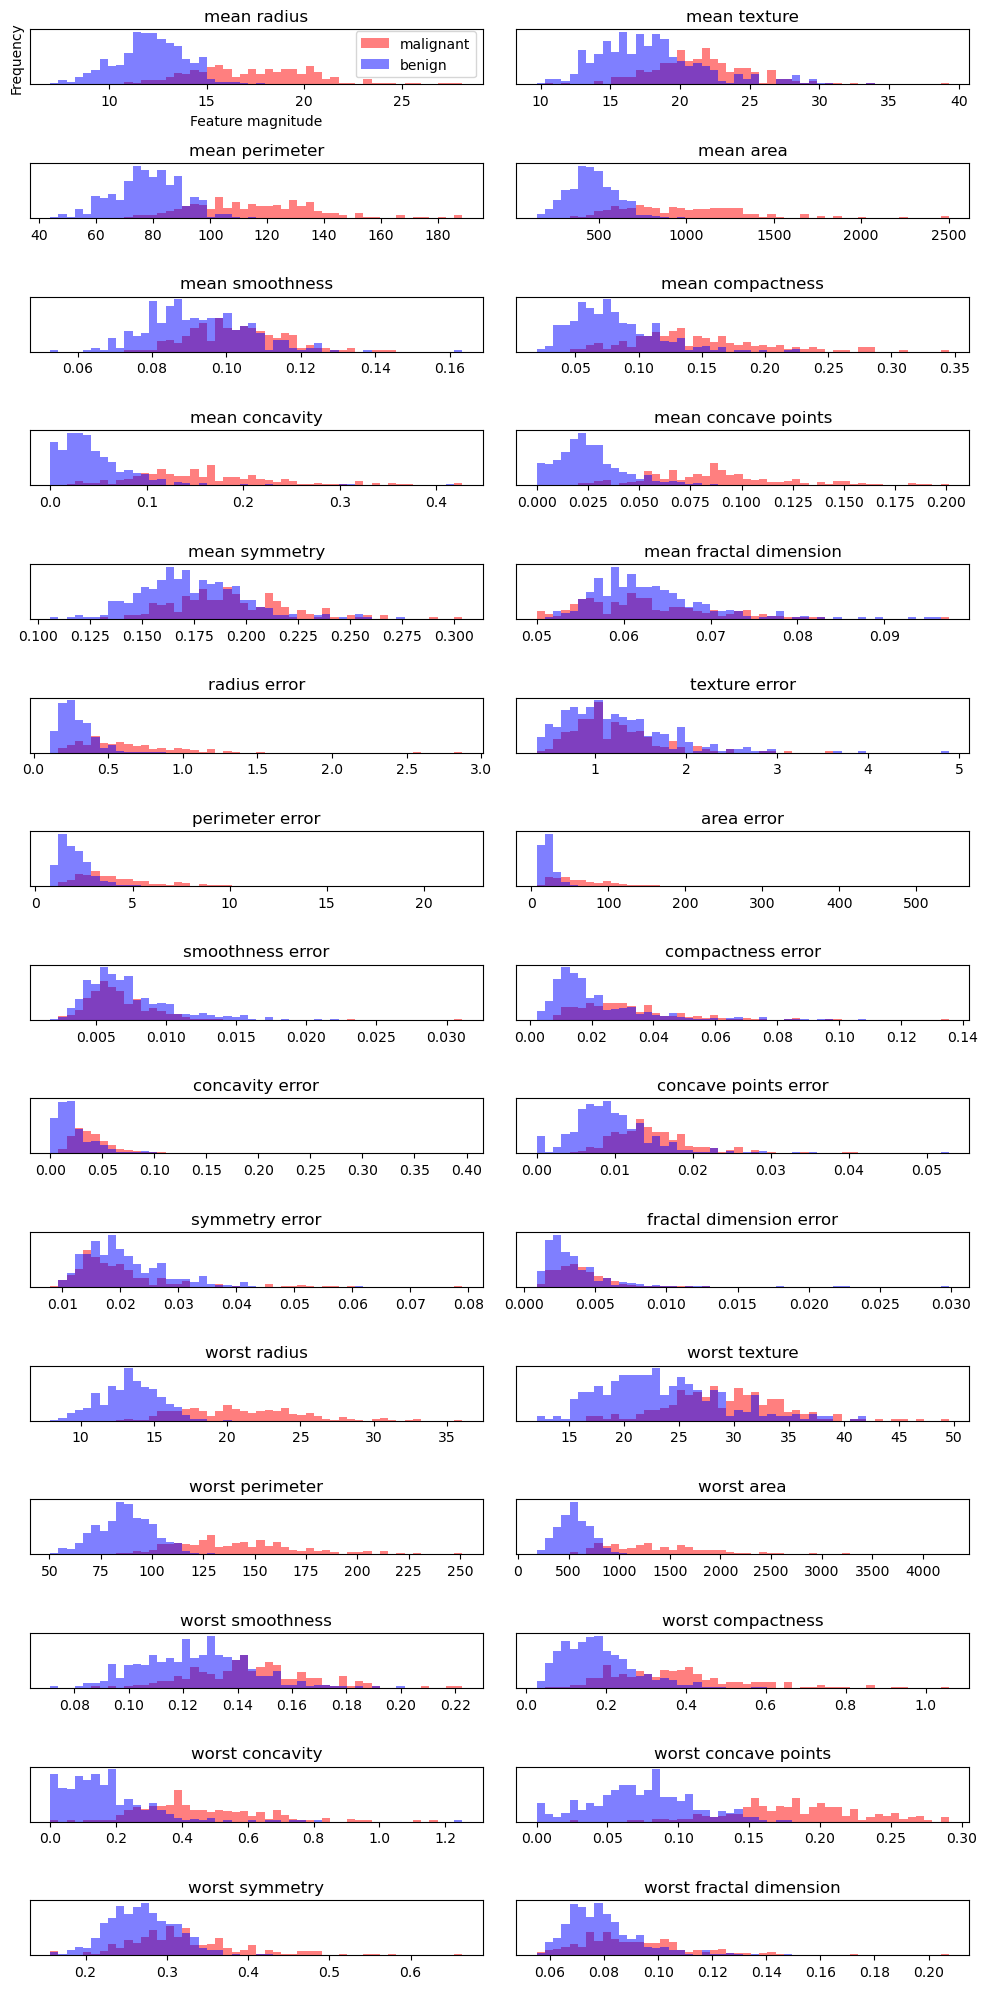

In [258]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

### Pairplot - mean values
- I also ran pairplots for the mean and worst values below for more in depth visualisation and exploration.

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

### Pairplot - worst values

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
selected_features = ['worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension','target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

### HeatMap Correlation Matrix
- By creating a heatmap across all features we can see how changes in one variable impact another, with some personal notes below.
  - If they both change in the same direction they are positively correlated
  - if one goes up and one goes down they are negatively correlated

<Axes: >

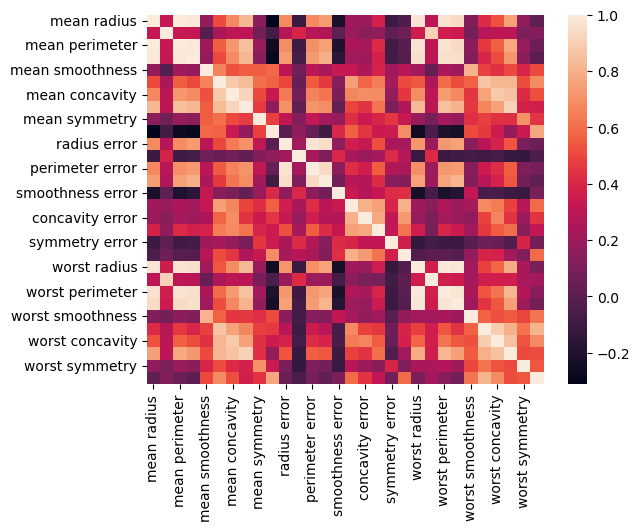

In [99]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sns.heatmap(df.corr()) 

- I did find the above matrix a bit overwhelming so I created another matrix displaying only mean values.
- At this point I believe I've determined enough features to investigation, however this further exploration is still helpful and may shed more light.

<Axes: >

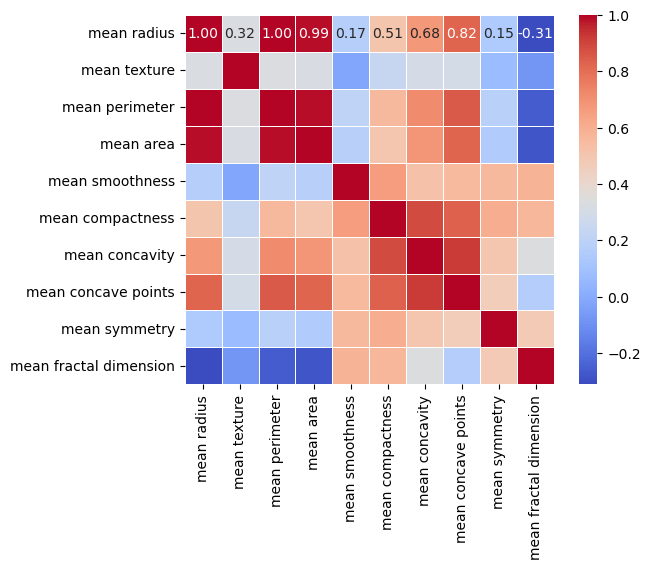

In [101]:
mean_attributes = df.iloc[:, :10].copy() 
sns.heatmap(mean_attributes.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

<Axes: >

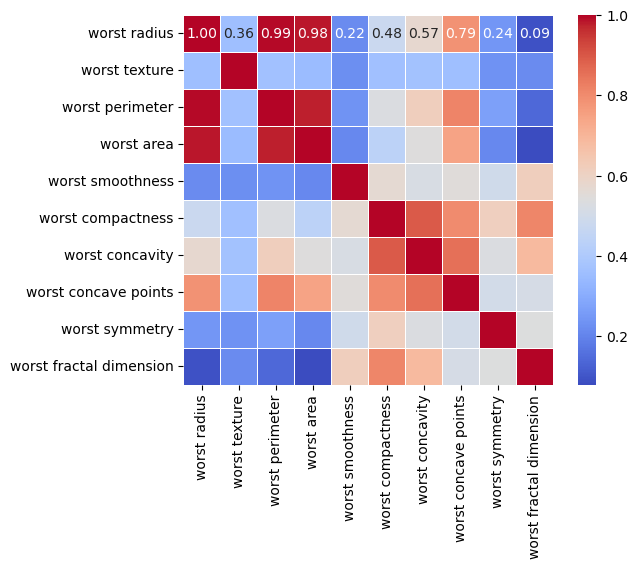

In [97]:
worst_attributes = df.iloc[:, 20:30].copy() 
sns.heatmap(worst_attributes.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

### Scatter  Plot Matrix
- The last area of investigation I conduct is by scatter plot, but more so for demonstration.
- I don't believe I was able to pull anymore insight at my current skill level or if this plot is even meaningful.

<Figure size 1200x1200 with 0 Axes>

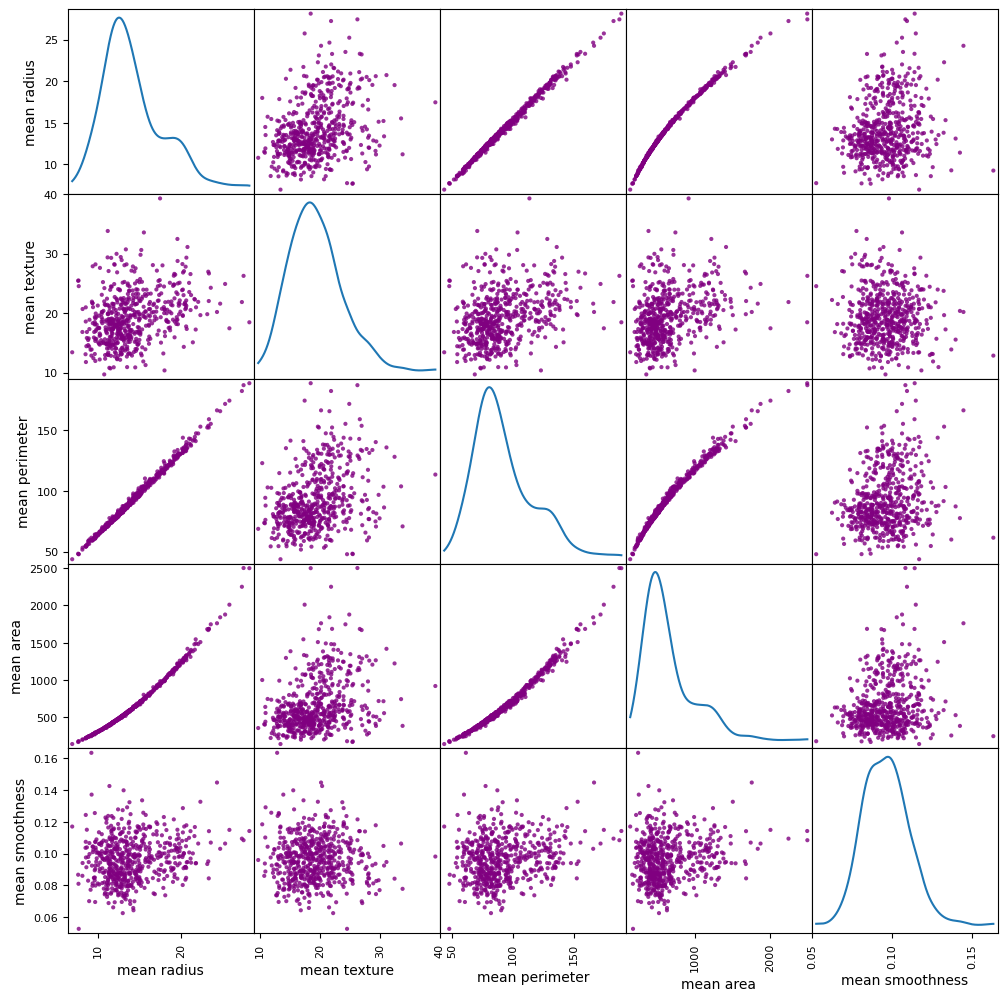

In [112]:
# Too big
# scatter_matrix(df)
# scatter_matrix(df.iloc[:, :5])
plt.figure(figsize=(12, 12))
scatter_matrix(df.iloc[:, :5], alpha=0.8, diagonal='kde', figsize=(12, 12), color='purple')
plt.show()

## Data Preparation (Criteria B3) 
Data preparation including transforms, scaling, re-shaping and any feature selection to reduce dimensionality.  
Summary of cleaned/pre-processed data ready for use for PRML model development.  
(*6 pts*)

**Answer:**  
In this section I demonstrates the following scaling functions:
- MinmaxScaler, StandardScaler, Normalizer and Binarize. 

I then demonstrate feature selection using:
- Recurse Feature Elimination and Principle Component Analysis

With the goal of:  
- Exposing the structure of the problem to the model correctly
- I'll work through applying a transform to the data and displaying the change

### MinMaxScaler
- Transforms data to be between 0 and 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler
MinMax_Scaler = MinMaxScaler()
MinMax_ScaledData = MinMax_Scaler.fit_transform(cancer.data)
np.set_printoptions(precision=3)
print("Transformed first sample below:")
MinMax_ScaledData[0]

Transformed first sample below:


array([0.521, 0.023, 0.546, 0.364, 0.594, 0.792, 0.703, 0.731, 0.686,
       0.606, 0.356, 0.12 , 0.369, 0.274, 0.159, 0.351, 0.136, 0.301,
       0.312, 0.183, 0.621, 0.142, 0.668, 0.451, 0.601, 0.619, 0.569,
       0.912, 0.598, 0.419])

In [261]:
print("Original sample below:")
cancer.data[0]

Original sample below:


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

- So above we can see the value 1.799e+01 (17.99) has been rescaled to 0.521, so all the features now fall with a range of 0 to 1.

### StandardScaler
- Rescales the features so the mean is 0 and a standard deviation of 1. 
- Potentially good for SVM models.

In [264]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_ScalerData = Standard_Scaler.fit_transform(cancer.data)
np.set_printoptions(precision=3)
print("Transformed first sample below:")
Standard_ScalerData[0]

Transformed first sample below:


array([ 1.097, -2.073,  1.27 ,  0.984,  1.568,  3.284,  2.653,  2.532,
        2.218,  2.256,  2.49 , -0.565,  2.833,  2.488, -0.214,  1.317,
        0.724,  0.661,  1.149,  0.907,  1.887, -1.359,  2.304,  2.001,
        1.308,  2.617,  2.11 ,  2.296,  2.751,  1.937])

### Normalizer

In [265]:
from sklearn.preprocessing import Normalizer
Normalizer_Scaler = Normalizer()
Normalizer_ScalerData = Normalizer_Scaler.fit_transform(cancer.data)
Normalizer_ScalerData[0]

array([7.925e-03, 4.573e-03, 5.410e-02, 4.410e-01, 5.216e-05, 1.223e-04,
       1.322e-04, 6.480e-05, 1.066e-04, 3.468e-05, 4.824e-04, 3.988e-04,
       3.784e-03, 6.758e-02, 2.819e-06, 2.160e-05, 2.367e-05, 6.991e-06,
       1.323e-05, 2.728e-06, 1.118e-02, 7.635e-03, 8.132e-02, 8.895e-01,
       7.146e-05, 2.932e-04, 3.136e-04, 1.169e-04, 2.027e-04, 5.238e-05])

### Binarize 

In [266]:
from sklearn.preprocessing import Binarizer
Binarizer_Scaler = Binarizer()
Binarizer_ScalerData = Binarizer_Scaler.fit_transform(cancer.data)
Binarizer_ScalerData[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Feature Selection

My objective in this section is to leverage sklearn modules to determine if the following features, identified earlier, align as significant indicators of malignancy:

- Mean and worst radius
- Mean and worst perimeter
- Mean and worst area
- Mean and worst concavity
- Mean and worst concave points

I'll store these features in an array for easy of reviewing through out the assignment.

To validate these features, I will employ the following methods:

- Univariate Selection
- Recursive Feature Elimination
- Principal Component Analysis

These tools will help assess the predictive power of the selected features.

In [20]:
manually_identified_malignancy_features = [
    'worst radius',
    'worst perimeter',
    'worst area',
    'worst concavity',
    'worst concave points'
]

for feature in manually_identified_malignancy_features:
    print(feature)


worst radius
worst perimeter
worst area
worst concavity
worst concave points


### Univariate Selection
- I'll use the f_classif function to determine the top 5 features that correspond to the outcome variable.

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

SelectKBest_Fit = SelectKBest(score_func=f_classif, k=5).fit(cancer.data, cancer.target)

scores = SelectKBest_Fit.scores_

# top_features_indices = np.argsort(scores)[-5:]
top_features_indices = np.argsort(scores)[-5:][np.argsort(cancer.feature_names[np.argsort(scores)[-5:]])]

print("Top 5 features and score")
for index in top_features_indices:
    print(f"{cancer.feature_names[index]} = {scores[index]}")

Top 5 features and score
mean concave points = 861.6760200073135
mean perimeter = 697.235272476532
worst concave points = 964.3853934517133
worst perimeter = 897.9442188597807
worst radius = 860.7817069850373


In [45]:
Univariate_Selected_Features = SelectKBest_Fit.transform(cancer.data)
print("\nTransformed data with top 5 features:")
print(Univariate_Selected_Features[:5])
print(Univariate_Selected_Features.shape)


Transformed data with top 5 features:
[[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [7.758e+01 1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.351e+02 1.043e-01 2.254e+01 1.522e+02 1.625e-01]]
(569, 5)


### Recursive Feature Elimination

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

LogisticRegression_Model = LogisticRegression(solver='liblinear')
RFE_Function = RFE(estimator=LogisticRegression_Model, n_features_to_select = 5)
RFE_Function_Fit = RFE_Function.fit(cancer.data, cancer.target)

In [47]:
RFE_Selected_Features = np.array(cancer.feature_names)[RFE_Function_Fit.support_]
print("Top 5 Features from RFE:")
for feature in np.sort(RFE_Selected_Features):
    print(feature)

RFE_Selected_Features = RFE_Function.transform(cancer.data)    
print(RFE_Selected_Features.shape)

Top 5 Features from RFE:
mean concavity
mean radius
worst concave points
worst concavity
worst radius
(569, 5)


### Principle Component Analysis

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit(cancer.data)
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

- The below statement shows that the first component captures 98% of the variance within the data, meaning that 98% can be summarised by this first component. I found this truly interesting.

In [49]:
pca_fit.explained_variance_ratio_

array([0.982, 0.016, 0.002])

- And the second and third components account for the remaining 0.16% and 0.002%.

In [50]:
print(pca.components_)

[[ 5.086e-03  2.197e-03  3.508e-02  5.168e-01  4.237e-06  4.053e-05
   8.194e-05  4.778e-05  7.078e-06 -2.622e-06  3.137e-04 -6.510e-05
   2.236e-03  5.573e-02 -8.056e-07  5.519e-06  8.871e-06  3.279e-06
  -1.241e-06 -8.545e-08  7.155e-03  3.067e-03  4.946e-02  8.521e-01
   6.420e-06  1.013e-04  1.689e-04  7.367e-05  1.790e-05  1.614e-06]
 [ 9.287e-03 -2.882e-03  6.275e-02  8.518e-01 -1.482e-05 -2.689e-06
   7.514e-05  4.635e-05 -2.524e-05 -1.612e-05 -5.387e-05  3.484e-04
   8.196e-04  7.511e-03  1.494e-06  1.274e-05  2.869e-05  9.360e-06
   1.226e-05  2.897e-07 -5.687e-04 -1.322e-02 -1.860e-04 -5.197e-01
  -7.686e-05 -2.561e-04 -1.755e-04 -3.051e-05 -1.570e-04 -5.531e-05]
 [-1.234e-02 -6.355e-03 -7.167e-02 -2.789e-02  7.266e-05  1.018e-04
   2.660e-04  3.605e-05  1.413e-04  5.064e-05  6.062e-03  6.234e-03
   4.386e-02  9.902e-01  4.345e-05  1.277e-04  2.074e-04  4.789e-05
   1.144e-04  2.432e-05 -1.557e-02 -3.154e-02 -9.231e-02 -3.932e-02
  -4.213e-05 -7.648e-04 -8.466e-04 -3.336e-04 

In [51]:
PCA_Selected_Features = pca.fit_transform(cancer.data)
print(PCA_Selected_Features.shape)

(569, 3)


# Model Selection (Criteria B4)
Selection of 3-4 PRML algorithms for the project that are most appropriate.  
How have you determined these to be most applicable?  
Explain your reasoning. (Use any feedback from Assignment 1).  
(*6 pts*)

- incorporating feedback from Assignment 1 I'll use the following models:
  1. LogisticRegression
  2. KNeighborsClassifier
  3. MLPClassifier
  4. SVC

- Explain my reasoning

- Determine the best based on accuracy evaluations

### GetResults Function

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

model = LogisticRegression()
def GetResults(X_train, X_test, y_train, y_test, SelectedFeatures, model):       
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{SelectedFeatures}")
    print(f"{model}")
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: ", accuracy)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(Univariate_Selected_Features, cancer.target, random_state=0)
GetResults(X_train, X_test, y_train, y_test, "Univariate_Selected_Features", model)

Univariate_Selected_Features
LogisticRegression()
0.9413145539906104
0.9230769230769231
Accuracy:  0.9230769230769231


In [59]:
X_train, X_test, y_train, y_test = train_test_split(RFE_Selected_Features, cancer.target, random_state=0)
GetResults(X_train, X_test, y_train, y_test, "RFE_Selected_Features", model)

RFE_Selected_Features
LogisticRegression()
0.9460093896713615
0.951048951048951
Accuracy:  0.951048951048951


In [60]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Selected_Features, cancer.target, random_state=0)
GetResults(X_train, X_test, y_train, y_test, "PCA_Selected_Features", model)

PCA_Selected_Features
LogisticRegression()
0.9295774647887324
0.9370629370629371
Accuracy:  0.9370629370629371


In [61]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
GetResults(X_train, X_test, y_train, y_test, "cancer.data", model)

cancer.data
LogisticRegression()
0.9460093896713615
0.951048951048951
Accuracy:  0.951048951048951


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### GetCrossValidation Function

In [474]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [477]:
def GetCrossValResults(X_train, X_test, y_train, y_test, SelectedFeatures):
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),

        ('SVM', SVC())
    ]
    print(f"!! {SelectedFeatures}")
    for name, model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

In [478]:
X_train, X_test, y_train, y_test = train_test_split(Univariate_Selected_Features, cancer.target, random_state=0)
GetCrossValResults(X_train, X_test, y_train, y_test, "Univariate_Selected_Features")

!! Univariate_Selected_Features
Logistic Regression: 0.9365 (+/- 0.0438)
Decision Tree: 0.9272 (+/- 0.0313)
Random Forest: 0.9437 (+/- 0.0271)
SVM: 0.9131 (+/- 0.0242)


In [462]:
X_train, X_test, y_train, y_test = train_test_split(RFE_Selected_Features, cancer.target, random_state=0)
GetCrossValResults(X_train, X_test, y_train, y_test, "RFE_Selected_Features")

!! RFE_Selected_Features
Logistic Regression: 0.9436 (+/- 0.0378)
Decision Tree: 0.9155 (+/- 0.0504)
Random Forest: 0.9437 (+/- 0.0371)
SVM: 0.9037 (+/- 0.0349)


In [463]:
X_train, X_test, y_train, y_test = train_test_split(PCA_Selected_Features, cancer.target, random_state=0)
GetCrossValResults(X_train, X_test, y_train, y_test, "PCA_Selected_Features")

!! PCA_Selected_Features
Logistic Regression: 0.9271 (+/- 0.0408)
Decision Tree: 0.9178 (+/- 0.0597)
Random Forest: 0.9248 (+/- 0.0487)
SVM: 0.9154 (+/- 0.0435)


In [466]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
GetCrossValResults(X_train, X_test, y_train, y_test, "cancer.data")

!! cancer.data


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression: 0.9459 (+/- 0.0796)
Decision Tree: 0.9155 (+/- 0.0405)
Random Forest: 0.9484 (+/- 0.0315)
SVM: 0.8990 (+/- 0.0386)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning for Logistic Regression
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],     # Solvers for optimization
    'max_iter': [100, 200, 300]           # Maximum number of iterations
}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

print("Best parameters:", log_reg_grid.best_params_)
print("Best cross-validation score:", log_reg_grid.best_score_)

# Best Model
log_reg_grid.best_estimator_


In [465]:
# Example of hyperparameter tuning for the best model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Best Model
rf_grid.best_estimator_

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9554582763337894


RandomForestClassifier(max_depth=10)

# AI assistance

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Define hyperparameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs'],
        'max_iter': [200, 300, 400]
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

# Define models with names
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Function to perform hyperparameter tuning and get results
def GetResults(X_train, X_test, y_train, y_test, SelectedFeatures, model_name, model, param_grid, file_handle):
    file_handle.write(f"Selected Features: {SelectedFeatures}\n")
    file_handle.write(f"Model: {model_name}\n")
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    file_handle.write(f"Best Parameters for {model_name}: {grid_search.best_params_}\n")
    file_handle.write(f"Best CV Score for {model_name}: {grid_search.best_score_}\n")
    
    # Cross-validation evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv, scoring='accuracy')
    file_handle.write(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}\n")
    
    # Use the best model found by GridSearchCV
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    # Evaluate on test data
    predictions = best_model.predict(X_test)
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Log accuracies only if they are greater than 96%
    if train_accuracy > 0.96:
        file_handle.write(f"Train Accuracy: {train_accuracy}\n")
    if test_accuracy > 0.96:
        file_handle.write(f"Test Accuracy: {test_accuracy}\n")
    if accuracy > 0.96:
        file_handle.write(f"Test Accuracy (using accuracy_score): {accuracy}\n")
    
    file_handle.write("-" * 50 + "\n")

# Train/test split function for each model and dataset
def run_model_across_datasets(X, y, SelectedFeatures, models, param_grids, file_handle):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    for model_name, model in models.items():
        GetResults(X_train, X_test, y_train, y_test, SelectedFeatures, model_name, model, param_grids[model_name], file_handle)

# Feature scaling options
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'Normalizer': Normalizer(),
    'Binarizer': Binarizer()
}

# Open file to store results
with open("model_results.txt", "w") as file_handle:
    for scaler_name, scaler in scalers.items():
        # Scale the data
        scaled_data = scaler.fit_transform(cancer.data)

        # Univariate Selection
        from sklearn.feature_selection import SelectKBest, f_classif
        SelectKBest_Fit = SelectKBest(score_func=f_classif, k=5).fit(scaled_data, cancer.target)
        Univariate_Selected_Features = SelectKBest_Fit.transform(scaled_data)

        # Recursive Feature Elimination (RFE)
        from sklearn.feature_selection import RFE
        RFE_Function = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5)
        RFE_Function_Fit = RFE_Function.fit(scaled_data, cancer.target)
        RFE_Selected_Features = RFE_Function.transform(scaled_data)

        # PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components=3)
        PCA_Selected_Features = pca.fit_transform(scaled_data)

        # Log results
        file_handle.write(f"### Running models on {scaler_name} ###\n")
        file_handle.write(f"Scaler Parameters: {scaler.get_params()}\n")
        
        # Run models on different datasets
        file_handle.write("### Running models on Univariate Selected Features ###\n")
        run_model_across_datasets(Univariate_Selected_Features, cancer.target, "Univariate_Selected_Features", models, param_grids, file_handle)

        file_handle.write("### Running models on RFE Selected Features ###\n")
        run_model_across_datasets(RFE_Selected_Features, cancer.target, "RFE_Selected_Features", models, param_grids, file_handle)

        file_handle.write("### Running models on PCA Selected Features ###\n")
        run_model_across_datasets(PCA_Selected_Features, cancer.target, "PCA_Selected_Features", models, param_grids, file_handle)

        file_handle.write("### Running models on Original Dataset ###\n")
        run_model_across_datasets(scaled_data, cancer.target, "Original Scaled Data", models, param_grids, file_handle)

print("Results exported to 'model_results.txt'")


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\James\

Results exported to 'model_results.txt'


In [70]:
# Function to extract the highest scoring model configuration from results
def get_highest_scoring_model(file_path):
    highest_score = 0
    best_model_info = ""

    with open(file_path, "r") as file_handle:
        lines = file_handle.readlines()
        for i, line in enumerate(lines):
            if "Best CV Score" in line:
                score = float(line.split(":")[-1].strip())
                if score > highest_score:
                    highest_score = score
                    best_model_info = lines[i - 2:i + 1]  # Grab model and parameters info

    print("Highest Scoring Model Configuration:")
    print("".join(best_model_info))
    print(f"Highest CV Score: {highest_score:.4f}")

# Call the function
get_highest_scoring_model("model_results.txt")


Highest Scoring Model Configuration:
Model: LogisticRegression
Best Parameters for LogisticRegression: {'C': 100, 'max_iter': 200, 'solver': 'saga'}
Best CV Score for LogisticRegression: 0.9835567715458277

Highest CV Score: 0.9836


In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cross_val_score
import numpy as np

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create and fit the Logistic Regression model with specified parameters
model = LogisticRegression(C=100, max_iter=200, solver='saga')
model.fit(X_train, y_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
best_cv_score = cv_scores.mean()

# Predictions and accuracy on the test set
predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)

# Output results
print("Highest Scoring Model Configuration:")
print(f"Model: LogisticRegression")
print(f"Best Parameters for LogisticRegression: {{'C': 100, 'max_iter': 200, 'solver': 'saga'}}")
print(f"Best CV Score for LogisticRegression: {best_cv_score:.10f}")
print(f"\nHighest CV Score: {best_cv_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


ImportError: cannot import name 'cross_val_score' from 'sklearn.metrics' (C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\__init__.py)

# Accuracy Reports (Criteria B5)
Implement the selected algorithms and generate the accuracy report for spot-checking the algorithms.  
(*10 pts*)


6. **False Positive and False Negative**:
   - **False Positive**: Incorrectly predicts a positive outcome when the actual outcome is negative.
   - **False Negative**: Incorrectly predicts a negative outcome when the actual outcome is positive.
   - **Implications**: Varies based on the context, such as medical diagnoses or spam detection.

7. **Precision and Recall**:
   - **Precision**: Ratio of true positive predictions to the total positive predictions made. Indicates the accuracy of positive predictions.
   - **Recall**: Ratio of true positive predictions to the total actual positive cases. Measures the model's ability to identify positive cases correctly.
   - **Use**: Particularly useful in cases of class imbalance.

8. **F1 Score**:
   - **Definition**: The harmonic mean of precision and recall. Provides a balance between precision and recall, especially in imbalanced datasets.
   - **Formula**: $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

9. **Confusion Matrix and Correlation Matrix**:
   - **Confusion Matrix**: A table showing the performance of a classification model with counts of true positives, true negatives, false positives, and false negatives.
   - **Correlation Matrix**: A table displaying correlation coefficients between multiple variables, used to understand feature relationships.

10. **Classification Report**:
    - **Definition**: A summary of a classification model's performance, including precision, recall, F1-score, and support for each class.
    - **Purpose**: Provides a comprehensive view of model performance across different classes, accounting for true positives, false positives, and false negatives.


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9370629370629371
[[49  4]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Part B

**1a. How are decision trees used for regression tasks different from those used for classification?**  
*(5 pts)*

**Answer:**  
There are separate classes for classification and regression tasks:

Both classes follow a top-down approach and consist of a root node, branches, and leaf nodes. The difference lies in how they handle their tasks:

*DecisionTreeClassifier()*
The classification class splits data into categories based on conditions, using if-else rules to differentiate between the classes:

- Gini Impurity: Measures how mixed up the classes are within a node. It’s the chance of picking a wrong class if you choose randomly.
- Entropy: Measures uncertainty or randomness in the data, showing how unpredictable the classes are.

*DecisionTreeRegressor()*
The regression class, instead of splitting into distinct categories, predicts continuous values (numbers) based on the data. It uses:

- Mean Squared Error (MSE): Measures how far the predicted numbers are from the actual numbers, by squaring the differences.
- Mean Absolute Error (MAE): Measures the average of the absolute differences between predicted and actual values.  


https://scikit-learn.org/stable/modules/tree.html
https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

**1b. How does a decision tree make predictions for new data points?**  
(*5 pts*)

**Answer:**  
A decision tree makes predictions by using the following process:

1. **Tree Structure**: The decision tree is built during training, where the algorithm splits the dataset into subsets based on feature values. The splits are chosen to maximize a specific metric, such as information gain or Gini impurity, which helps separate different classes effectively.

2. **Leaf Nodes and Predictions**: Each leaf node of the tree represents a decision about the class label. In the case of the breast cancer dataset, the leaf nodes indicate whether a sample is classified as malignant (`1`) or benign (`0`).

3. **Prediction Process for New Data**: 
    - For a new data point, the decision tree algorithm starts at the root node and applies decision rules (based on feature values).
    - It checks whether the data point’s feature values satisfy the condition at each node and moves left or right in the tree accordingly.
    - This process continues until the algorithm reaches a leaf node, where it outputs the class prediction for the data point.


**2a. What is the criterion being optimized by SVMs?**  
(*5 pts*)

**Answer:**  
The criterion being optimized by Support Vector Machines (SVMs) is the **margin** between the decision boundary and the closest data points from each class, which are called **support vectors**.

Picture taken from *Introduction to Machine Learning with Python* illustrating the Support Vectors with a bold outline that are closest to the decision boundary:  

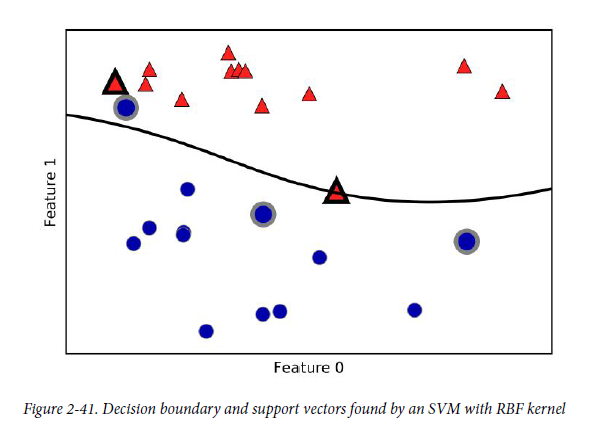


**2b. How do SVMs handle the case of non-linearly separable data? What is the ‘kernel trick’, and why is it used in SVMs?**  
(*5 pts*)

**Answer:**  
Referencing and paraphrasing from page 97 of *Introduction to Machine Learning with Python*;  

The Kernal Trick essentially allows us to handle non-linear data without calculating a possibly huge transformation, by computing the distance (the scalar products). There are two kernels available with SVMs:  

1. Polynomial Kernels
2. Radial Basis Kernels (Gaussian Kernel)

**2c. How can SVMs be extended to handle multi-class classification problems?**  
(*5 pts*)

**Answer:**  
SVMs can handle multi-class classification problems through the following approaches:

*One-vs-One*
   - An SVM classifier is created for every pair of classes in the dataset.
   - For each classifier, only two classes are used.
   
*One-vs-Rest*
   - An SVM classifier is created specifically for each class, that matches against the remaining classes.
   - For each classifier, the class being considered is labeled as one class (positive), and all other classes are combined into a single "rest" class (negative).

**3a. Dataset description – breast-cancer dataset (refer to the sklearn dataset on breast-cancer)**  
(*5 pts*)

**Answer:**  
The *Breast Cancer Dataset* in the sklearn library is a well-known dataset used for binary classification tasks and was used in Part 1 of this assignment.

*Dataset Overview*
- **Source**: The dataset comes from the UCI Machine Learning Repository.
- **Type**: Supervised binary classification.
- **Classes**: Two classes—**benign** (coded as `0`) and **malignant** (coded as `1`).
  
*Features*
The dataset contains **30 numerical features**, which are computed from digitized images of a breast mass. These features describe the characteristics of the cell nuclei present in the image, with attributes like:
1. **Radius** (mean, standard error, worst)
2. **Texture** (mean, standard error, worst)
3. **Perimeter** (mean, standard error, worst)
4. **Area** (mean, standard error, worst)
5. **Smoothness** (mean, standard error, worst)
6. **Compactness** (mean, standard error, worst)
7. **Concavity** (mean, standard error, worst)
8. **Concave points** (mean, standard error, worst)
9. **Symmetry** (mean, standard error, worst)
10. **Fractal dimension** (mean, standard error, worst)

For each feature, the dataset provides the **mean**, **standard error**, and **worst** (largest) value, resulting in the 30 features in total.

*Dataset Summary*
- **Samples**: 569 total samples.
  - **Benign**: 357 samples.
  - **Malignant**: 212 samples.
- **Number of Features**: 30 numerical features, described above.
- **Target Variable**: Binary classification (benign = 0, malignant = 1).

*Use Case*
The goal of the dataset is to build a model that can predict whether a tumor is malignant or benign based on the provided features.

**3b. What model parameters and hyperparameters are relevant to SVM-BC and used in the sklearn package SVM?  
How can they be tuned for optimisation?**
(*5 pts*)

**Answer:**  
1. **Kernel**

2. **Regularization Parameter (C)**

3. **Gamma**

4. **Max Iterations**

**Optimization Techniques**
1. **Grid Search with Cross-Validation**: Systematically tests combinations of hyperparameters (e.g., `C`, `gamma`, `kernel`, etc.) to find the best set for your model. Use `GridSearchCV` in `sklearn`.
   
2. **Random Search with Cross-Validation**: Instead of testing all possible combinations, it randomly samples from the parameter grid, which can be faster when dealing with large hyperparameter spaces. Use `RandomizedSearchCV`.

3. **Cross-Validation**: Always evaluate the performance of different hyperparameter combinations using cross-validation to prevent overfitting and ensure generalization.

**3c. What are relevant kernel functions and how are they used in SVM learners?  
Which one have you selected for your implementation of SVM through sklearn?  
How have you decided the best kernel?**  
(*5 pts*)

**Answer:**   
In Support Vector Machines (SVM), **kernel functions** are used to transform the input data into a higher-dimensional space, allowing the SVM to find an optimal separating hyperplane, especially in cases where data is not linearly separable. Common kernel functions include:

1. **Linear Kernel**:
   - Used when the data is linearly separable.
   - It simply calculates the dot product between two data points.

2. **Polynomial Kernel**:
   - Introduces polynomial interactions of the features.
   - Suitable for data that requires higher-order feature interactions for separation.

3. **Radial Basis Function (RBF) Kernel**:
   - The most commonly used kernel.
   - Works well with non-linearly separable data by mapping data to an infinite-dimensional space.

4. **Sigmoid Kernel**:
   - Acts similarly to neural networks.
   - Suitable for binary classification with non-linear decision boundaries.

**Kernel Selected for Implementation of SVM through sklearn**

For my implementation of SVM using the **sklearn** library, I selected the **RBF (Radial Basis Function) kernel**. This kernel is ideal for non-linearly separable data like the breast cancer dataset because it maps the data to a higher-dimensional space where a linear separation can be found.

**Deciding the Best Kernel**

To determine the best kernel, I experimented with various kernels, including **linear**, **polynomial**, and **RBF**, using cross-validation to evaluate their performance. The process involved:

1. **Cross-Validation**:
   I used **cross-validation** to evaluate each kernel's performance on the training dataset, checking accuracy, precision, recall, and F1-score to understand which kernel generalized best.

2. **Hyperparameter Tuning**:
   I performed **grid search** over hyperparameters, particularly for the polynomial and RBF kernels, adjusting parameters like the degree (for polynomial kernel) and \(\gamma\) (for RBF kernel).

3. **Model Performance**:
   The **RBF kernel** consistently provided the best performance in terms of classification accuracy, handling the complexity of the data well. Thus, I selected the RBF kernel as it balanced **accuracy** and **model complexity** effectively.



**3d. What do the parameters C, decision_function_shape=’ovr’, degree, gamma and kernel mean in the following SVM classifier call?**  

SVC(C=1.0, cache_size=200, class_weight=None, coef0.0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

(*5 pts*)

**Answer:**  

1. **C=1.0**:
   - **Regularization parameter**.
   - A **smaller C** makes the margin larger and allows more misclassification, leading to a simpler model with higher bias.
   - A **larger C** focuses more on minimizing classification errors, leading to a more complex model with lower bias and possibly higher variance.

2. **decision_function_shape='ovr'**:
   - **'ovr' (One-vs-Rest)**: For multi-class classification, this method trains one binary classifier per class, meaning for an \(n\)-class problem, it builds \(n\) binary classifiers.

3. **degree=3**:
   - Specifies the **degree of the polynomial** for the kernel function. Higher values lead to more complex decision boundaries.
   - In this case, it's not used directly since the kernel selected is RBF (not polynomial), but it would matter if the **'poly'** kernel were chosen.

4. **gamma='auto'**:
   - Relevant for the **RBF, polynomial, and sigmoid kernels**.
   - Controls how far the influence of a single training example reaches. **Low values** (e.g., small \(\gamma\)) mean that the model considers faraway points, leading to smoother decision boundaries, while **high values** (e.g., large \(\gamma\)) focus more on nearby points, leading to a more complex model.

5. **kernel='rbf'**:
   - The **kernel function** used to transform the data into a higher-dimensional space.
   - **'rbf' (Radial Basis Function)** is the default kernel and commonly used for non-linearly separable data.

**3e. Implement the SVM-BC classifier for the breast-cancer dataset.  
Show the outcomes.**  
(*8 pts*)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the breast cancer dataset
cancer = load_breast_cancer()

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 3. Initialize and train the SVM classifier
SVM_classifier = SVC(kernel='linear', C=1.0, random_state=0)
SVM_classifier.fit(X_train, y_train)

# 4. Predict on the test set
SVM_y_pred = SVM_classifier.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, SVM_y_pred)
conf_matrix = confusion_matrix(y_test, SVM_y_pred)
class_report = classification_report(y_test, SVM_y_pred)

# Print accuracy, confusion matrix, and classification report
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 6. Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM-BC on Breast Cancer Dataset')
plt.show()

**3f. Perform an accuracy analysis using a classification report for both the DecisionTree model and the SVM-BC model?  
Which model is better? Justify.**  
(*5 pts*)

In [8]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and fit the Decision Tree model
TREE_classifier = DecisionTreeClassifier(random_state=0)
TREE_classifier.fit(X_train, y_train)

# Make predictions with the Decision Tree model
TREE_y_pred = TREE_classifier.predict(X_test)

In [11]:
# Generate classification reports
TREE_report = classification_report(y_test, TREE_y_pred, target_names=cancer.target_names)
SVM_report = classification_report(y_test, SVM_y_pred, target_names=cancer.target_names)

print("Decision Tree Classification Report:\n", TREE_report)
print("SVM Classification Report:\n", SVM_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

   malignant       0.78      0.94      0.85        53
      benign       0.96      0.84      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143

SVM Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.98      0.95        53
      benign       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all actual positives.
- **F1-Score**: The weighted average of precision and recall, useful for imbalanced datasets.
- **Accuracy**: The overall correctness of the model.

**Which Model is Better?**

To determine which model is better, consider the following:

1. **Overall Accuracy**: Check the accuracy values from the reports. Higher accuracy indicates a better model for general predictions.

2. **Precision and Recall**: Depending on the problem, you might prioritize precision (important if false positives are costly) or recall (important if false negatives are costly). For a breast cancer dataset, both metrics are typically important.

3. **F1-Score**: This metric balances precision and recall. A higher F1-score indicates a better model for binary classification problems.

**Justification**

After examining the classification reports, you can conclude which model is better based on the metrics. For example, if the SVM model shows a higher F1-score and accuracy with balanced precision and recall compared to the Decision Tree, you might conclude that the SVM model is better suited for this dataset due to its ability to handle non-linear relationships effectively. 

# References

Müller A, Guido S (2016) Introduction to Machine Learning with Python A Guide for Data Scientists. O'Reilly Media.  
https://www.saintjohnscancer.org/breast/breast-cancer/types-of-breast-cancer/

**End of document**